###### Author:Ratnam Dubey

###### Renaissance Learning

In [1]:
# Importing Required Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder
plt.rcParams.update({'font.size':6})
from collections import defaultdict
d = defaultdict(LabelEncoder)
d1 = defaultdict(LabelEncoder)
from sklearn.linear_model import LogisticRegression

###### Importing the Data

In [3]:
demographic =  pd.read_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\demographic.csv" )
quiz_act =  pd.read_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\quiz_act.csv")
sub_16 =  pd.read_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\sub_data_15_16.csv")
sub_17 =  pd.read_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\sub_data_17.csv")

In [4]:
sub_16.rename(columns ={'﻿School ID' : 'ID'} , inplace=True)
sub_17.rename(columns ={'﻿School ID' : 'ID'} , inplace=True)
demographic.rename(columns ={'﻿School ID' : 'ID'} , inplace=True)
quiz_act.rename(columns ={'﻿School ID' : 'ID'} , inplace=True)

###### Stripping the columns Name as they are not consistant  changing School_ID to ID 

In [5]:
sub_16.columns = sub_16.columns.str.strip()
sub_17.columns = sub_17.columns.str.strip()
demographic.columns = demographic.columns.str.strip()
quiz_act.columns = quiz_act.columns.str.strip()

###### Combining the Data with demographic Information as to get better insight on the Data for Analysis

In [6]:
sub_16_demo = pd.merge(sub_16, demographic, on='ID')
sub_17_demo = pd.merge(sub_17, demographic, on='ID')

###### Replacing the Space with Under Score as the colummn name has space in the names

In [7]:
sub_16_demo.columns = [c.replace(' ', '_') for c in sub_16_demo.columns]
sub_17_demo.columns = [c.replace(' ', '_') for c in sub_17_demo.columns]

##### Exploring the Data 

In [8]:
sub_16_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23215 entries, 0 to 23214
Data columns (total 17 columns):
ID                                 23215 non-null int64
State                              23215 non-null object
Subscription_End_Date              23215 non-null object
Expiring_Dollars                   23215 non-null int64
Expiring_Students                  23215 non-null int64
Subscription_Status                23215 non-null object
Renewal_Date                       21277 non-null object
Metro_Code                         22135 non-null object
Apple_Mac_Code                     19954 non-null object
PC_Code                            19954 non-null object
Poverty_Level_Code                 19781 non-null object
Avg_Household_Income               23215 non-null object
Title_1_Code                       19815 non-null object
Software_budget_per_head           19954 non-null object
Training_Budget_Per_head           19954 non-null object
Lunch_Program_Eligible_Students    2321

In [9]:
sub_16_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23215 entries, 0 to 23214
Data columns (total 17 columns):
ID                                 23215 non-null int64
State                              23215 non-null object
Subscription_End_Date              23215 non-null object
Expiring_Dollars                   23215 non-null int64
Expiring_Students                  23215 non-null int64
Subscription_Status                23215 non-null object
Renewal_Date                       21277 non-null object
Metro_Code                         22135 non-null object
Apple_Mac_Code                     19954 non-null object
PC_Code                            19954 non-null object
Poverty_Level_Code                 19781 non-null object
Avg_Household_Income               23215 non-null object
Title_1_Code                       19815 non-null object
Software_budget_per_head           19954 non-null object
Training_Budget_Per_head           19954 non-null object
Lunch_Program_Eligible_Students    2321

###### Getting demographic changes  based on Scaled Data

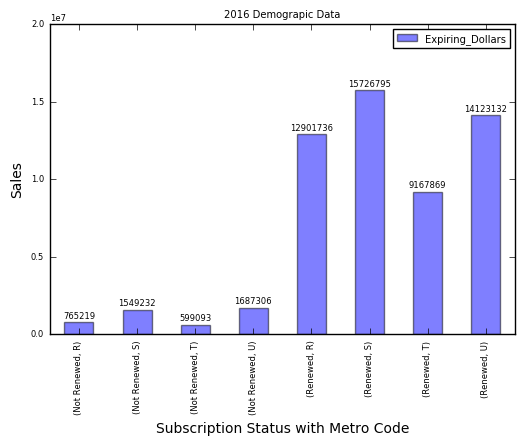

In [10]:
ax = sub_16_demo.groupby(['Subscription_Status' ,'Metro_Code'])['Expiring_Dollars'].sum().plot(kind="Bar", title="2016 Demograpic Data" , alpha=0.5 , ylim=(0,20000000) ,)
plt.xlabel('Subscription Status with Metro Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points' )
plt.legend()
plt.show()

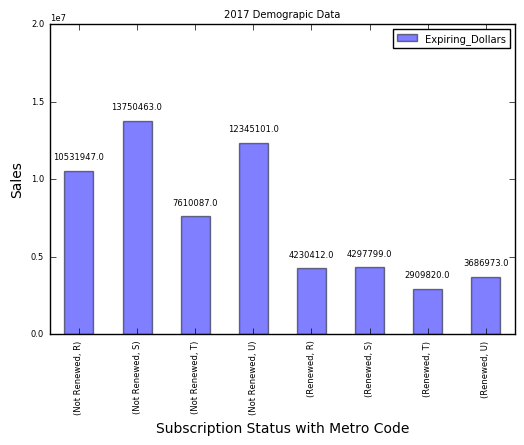

In [11]:
ax = sub_17_demo.groupby(['Subscription_Status' ,'Metro_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title="2017 Demograpic Data" , alpha=0.5 , ylim=(0,20000000) ,)
plt.xlabel('Subscription Status with Metro Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Cheking the Demographic Information Based on Avg Income 

In [12]:
demographic_op_1 = sub_16_demo.groupby(['Subscription_Status','Metro_Code' ,'Avg_Household_Income' ])['Expiring_Dollars'].sum()
demographic_op_1.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\Demographic_op1.csv", index=True , header=True)

demographic_op_2 = sub_17_demo.groupby(['Subscription_Status','Metro_Code' ,'Avg_Household_Income' ])['Expiring_Dollars'].sum()
demographic_op_2.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\Demographic_op2.csv", index=True , header=True)

In [13]:
demographic_op_3 = sub_16_demo.groupby(['Subscription_Status','Metro_Code' ,'Poverty_Level_Code' ])['Expiring_Dollars'].count()
demographic_op_3.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\Demographic_op3.csv", index=True , header=True)

demographic_op_4 = sub_17_demo.groupby(['Subscription_Status','Metro_Code' ,'Poverty_Level_Code' ])['Expiring_Dollars'].count()
demographic_op_4.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\Demographic_op4.csv", index=True , header=True)

#### Results are drived in Excel for Avg Income and Poverty Level

######     Finding the KPI (Key performance Indicators ) like Average Selling Price  = Sales / Number of Students 

In [14]:
sub_16_demo['Avg_Sell_price'] = sub_16_demo['Expiring_Dollars']/sub_16_demo['Expiring_Students']
sub_17_demo['Avg_Sell_price'] = sub_17_demo['Expiring_Dollars']/sub_17_demo['Expiring_Students']

In [15]:
# Checking the Impact of Average selling price on the Sales

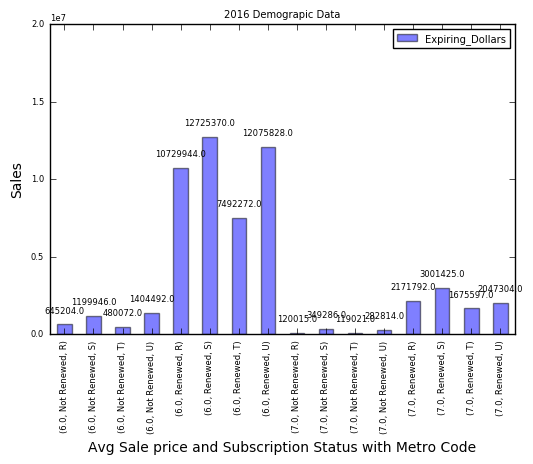

In [16]:
ax = sub_16_demo.groupby(['Avg_Sell_price' ,'Subscription_Status' ,'Metro_Code'])['Expiring_Dollars'].sum().plot(kind="Bar", title="2016 Demograpic Data", alpha=0.5 , ylim=(0,20000000) ,)
plt.xlabel('Avg Sale price and Subscription Status with Metro Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

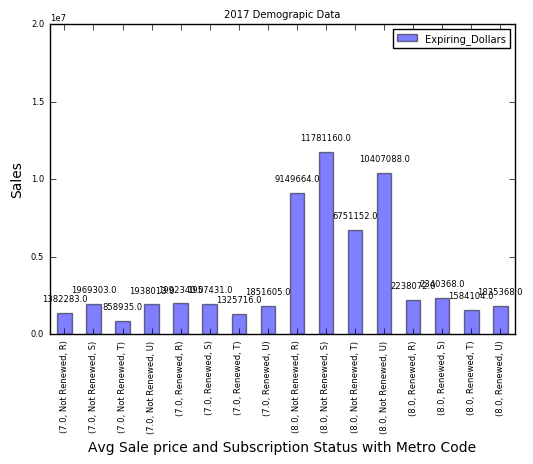

In [17]:
ax = sub_17_demo.groupby(['Avg_Sell_price' ,'Subscription_Status' ,'Metro_Code'])['Expiring_Dollars'].sum().plot(kind="Bar", title="2017 Demograpic Data", alpha=0.5 , ylim=(0,20000000) ,)
plt.xlabel('Avg Sale price and Subscription Status with Metro Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Are we Experiencing any time lag ??

In [18]:
sub_16_demo['Renewal_Date'] = sub_16_demo['Renewal_Date'].apply(pd.to_datetime)
sub_16_demo['Subscription_End_Date'] = sub_16_demo['Subscription_End_Date'].apply(pd.to_datetime)

sub_16_demo['Renew_delay'] = sub_16_demo['Renewal_Date'] - sub_16_demo['Subscription_End_Date']
sub_16_demo['Renew_delay'] = sub_16_demo['Renew_delay'] / np.timedelta64(1, 'D')

sub_17_demo['Renewal_Date'] = sub_17_demo['Renewal_Date'].apply(pd.to_datetime)
sub_17_demo['Subscription_End_Date'] = sub_17_demo['Subscription_End_Date'].apply(pd.to_datetime)

sub_17_demo['Renew_delay'] = sub_17_demo['Renewal_Date'] - sub_17_demo['Subscription_End_Date']
sub_17_demo['Renew_delay'] = sub_17_demo['Renew_delay'] / np.timedelta64(1, 'D')

###### Grouping the Time Lag 

In [19]:
def transform_diff_grp(dl):
    if dl > 180 : return 10
    elif 150 < dl <= 180 : return 9
    elif 120 < dl <= 150 : return 8
    elif 90 < dl <= 120 : return 7
    elif 30 < dl <= 90 : return 6
    elif 0 <= dl <= 30 : return 5
    elif -30 < dl <= -1 : return 4
    elif -90 < dl <= -30 : return 3
    elif -150 <= dl <= -90 : return 2
    elif -400 < dl <= -151 : return 1

In [20]:
sub_16_demo["Days_group"] = sub_16_demo['Renew_delay'].map(transform_diff_grp)
sub_17_demo["Days_group"] = sub_17_demo['Renew_delay'].map(transform_diff_grp)

In [21]:
sub_16_demo['Days_group'].fillna(11, inplace=True)
sub_17_demo['Days_group'].fillna(11, inplace=True)

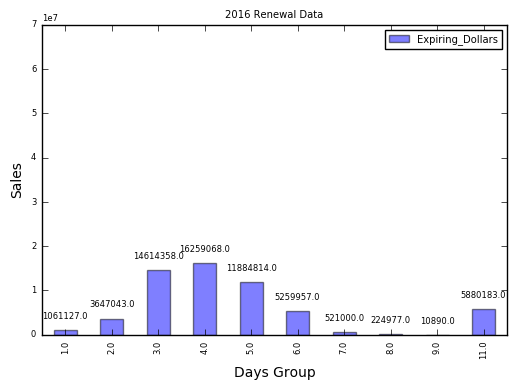

In [22]:
ax = sub_16_demo.groupby(['Days_group'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 Renewal Data", alpha=0.5 , ylim=(0,70000000))
plt.xlabel('Days Group', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

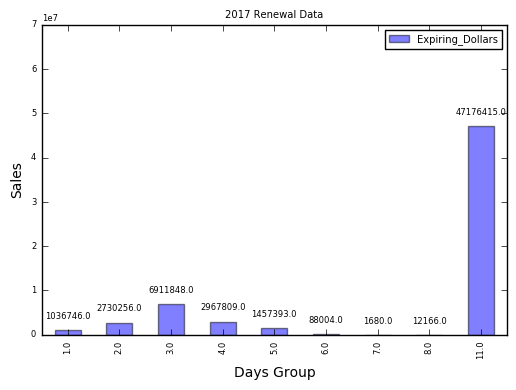

In [23]:
ax = sub_17_demo.groupby(['Days_group'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renewal Data", alpha=0.5 , ylim=(0,70000000))
plt.xlabel('Days Group', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Gropuing of Renewed and Not Renewed data 

In [24]:
sub_16_demo_ren = sub_16_demo[sub_16_demo['Subscription_Status']== "Renewed"]
sub_16_demo_nonren = sub_16_demo[sub_16_demo['Subscription_Status']== "Not Renewed"]

sub_17_demo_ren = sub_17_demo[sub_17_demo['Subscription_Status']== "Renewed"]
sub_17_demo_nonren = sub_17_demo[sub_17_demo['Subscription_Status']== "Not Renewed"]

###### Imputing Missing values "ZZ" in all the columns as the ZZ is not Present in Data as to get the missing value count 

In [25]:
sub_16_demo_ren.fillna('ZZ', inplace=True)
sub_17_demo_ren.fillna('ZZ', inplace=True)

sub_16_demo_nonren.fillna('ZZ', inplace=True)
sub_17_demo_nonren.fillna('ZZ', inplace=True)

C:\Users\dubey\Anaconda2\lib\site-packages\pandas\core\frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


##### Metro Space Analysis { R Rural/Non-Metro , S Suburban, U Urban , T Town }

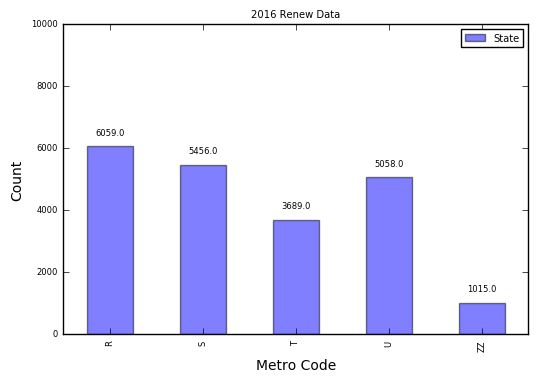

In [26]:
 ax = sub_16_demo_ren.groupby(['Metro_Code'])['State'].count().plot(kind="Bar" , title= "2016 Renew Data", alpha=0.5 , ylim=(0,10000))
plt.xlabel('Metro Code', fontsize=10)
plt.ylabel('Count', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

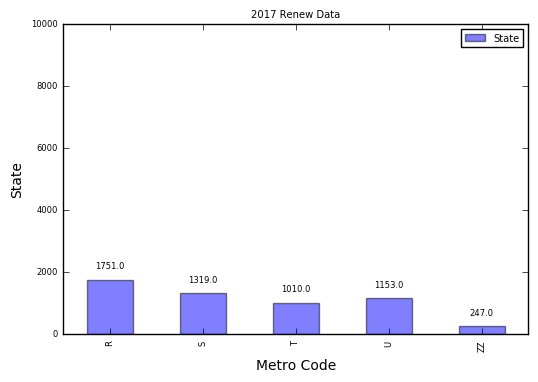

In [27]:
 ax = sub_17_demo_ren.groupby(['Metro_Code'])['State'].count().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,10000))
plt.xlabel('Metro Code', fontsize=10)
plt.ylabel('State', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

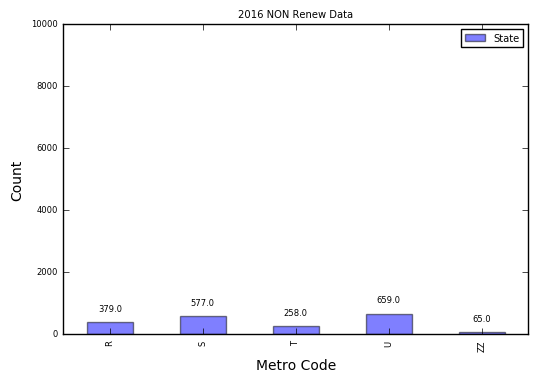

In [28]:
 ax = sub_16_demo_nonren.groupby(['Metro_Code'])['State'].count().plot(kind="Bar" , title= "2016 NON Renew Data", alpha=0.5 , ylim=(0,10000))
plt.xlabel('Metro Code', fontsize=10)
plt.ylabel('Count', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

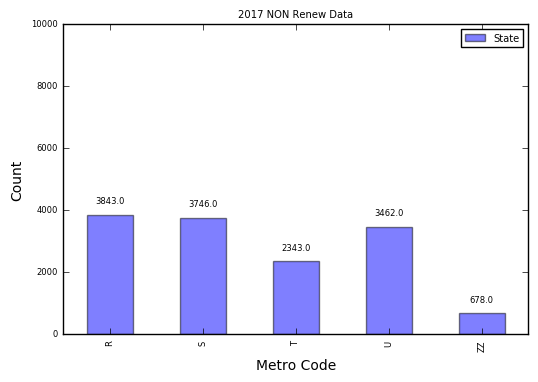

In [29]:
 ax = sub_17_demo_nonren.groupby(['Metro_Code'])['State'].count().plot(kind="Bar" , title= "2017 NON Renew Data", alpha=0.5 , ylim=(0,10000))
plt.xlabel('Metro Code', fontsize=10)
plt.ylabel('Count', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Apple Mac Code {A 1-9  B 10-24  C 25-49 D 50-99 E 100-249 F 250-499 G 500-999 H 1,000-4,999 I 5,000-9,999 J 10,000 Or More K Unknown Quantity}


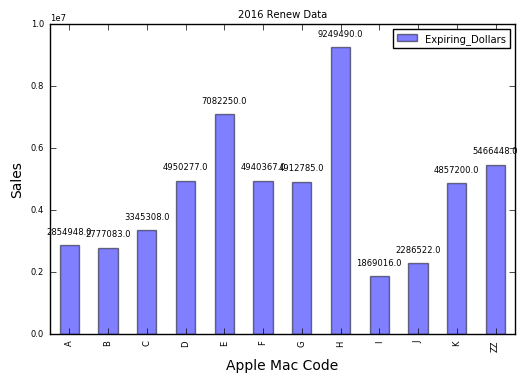

In [30]:
 ax = sub_16_demo_ren.groupby(['Apple_Mac_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 Renew Data", alpha=0.5 , ylim=(0,10000000))
plt.xlabel('Apple Mac Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

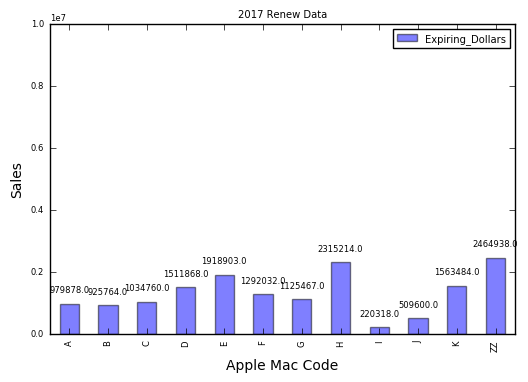

In [31]:
 ax = sub_17_demo_ren.groupby(['Apple_Mac_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,10000000))
plt.xlabel('Apple Mac Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

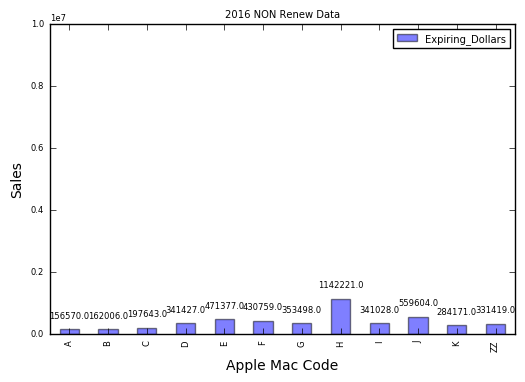

In [32]:
 ax = sub_16_demo_nonren.groupby(['Apple_Mac_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 NON Renew Data", alpha=0.5 , ylim=(0,10000000))
plt.xlabel('Apple Mac Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

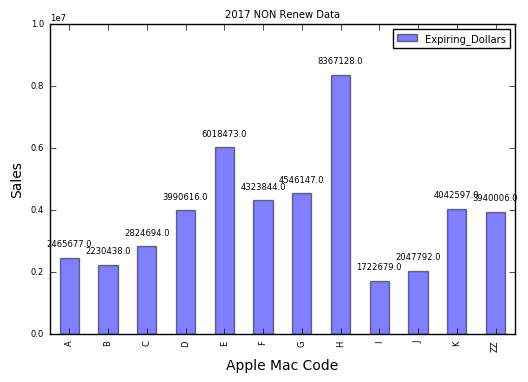

In [33]:
 ax = sub_17_demo_nonren.groupby(['Apple_Mac_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 NON Renew Data", alpha=0.5 , ylim=(0,10000000))
plt.xlabel('Apple Mac Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### PC Code A 1-9 B 10-24 C 25-49 D 50-99  E 100-249 F 250-499  G 500-999 H 1,000-4,999 I 5,000-9,999 J 10,000 Or More K Unknown Quantity  )

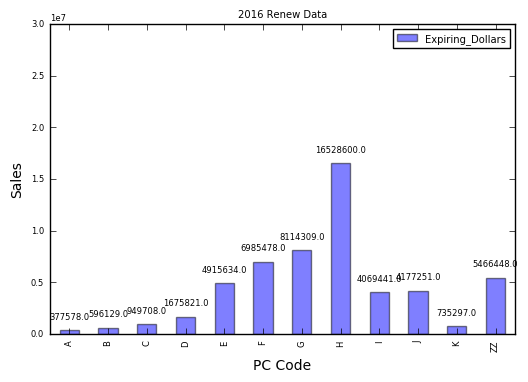

In [34]:
 ax = sub_16_demo_ren.groupby(['PC_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('PC Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

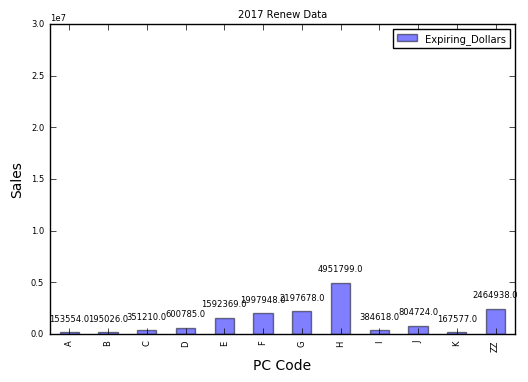

In [35]:
 ax = sub_17_demo_ren.groupby(['PC_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('PC Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

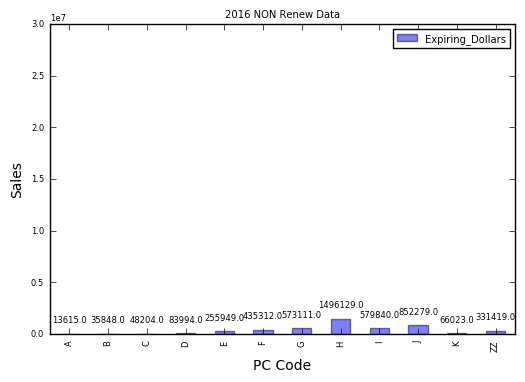

In [36]:
 ax = sub_16_demo_nonren.groupby(['PC_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 NON Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('PC Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

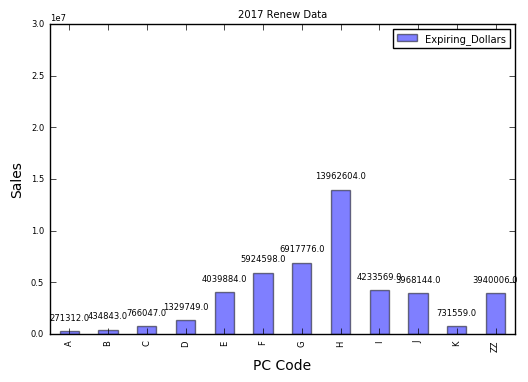

In [37]:
 ax = sub_17_demo_nonren.groupby(['PC_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('PC Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Poverty Level ( A 0 - 5.9 Percent B 6 - 15.9 Percent C 16 - 30.9 Percent D 31 Percent Or More  E Unclassified)


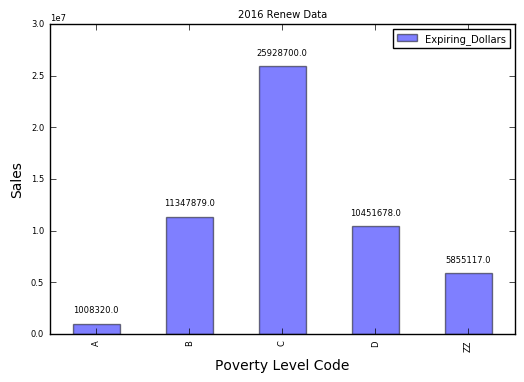

In [38]:
 ax = sub_16_demo_ren.groupby(['Poverty_Level_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('Poverty Level Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

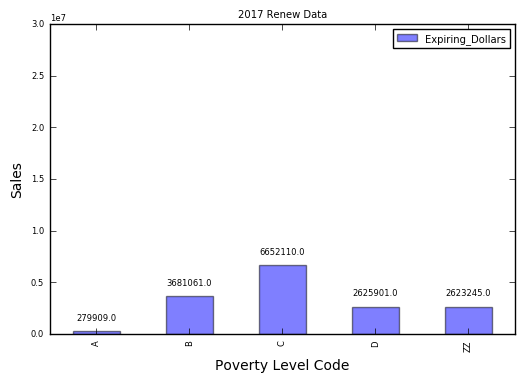

In [39]:
 ax = sub_17_demo_ren.groupby(['Poverty_Level_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('Poverty Level Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

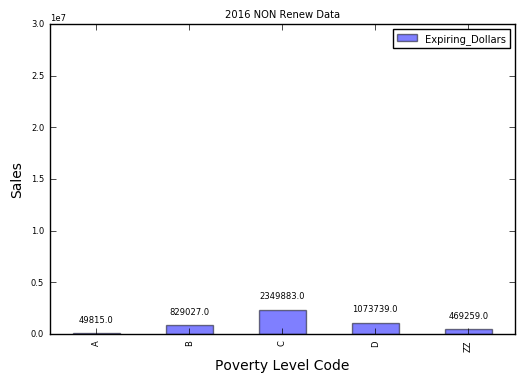

In [40]:
 ax = sub_16_demo_nonren.groupby(['Poverty_Level_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 NON Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('Poverty Level Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

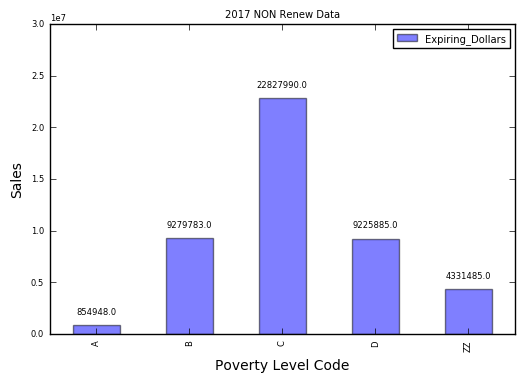

In [41]:
 ax = sub_17_demo_nonren.groupby(['Poverty_Level_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 NON Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('Poverty Level Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

##### Average House hold Income { A 1-27,999  B 28,000-31,999 C 32,000-34,999 D 35,000-36,999 E 37,000-38,999 F 39,000-40,999 G 41,000-42,999 H 43,000-44,999 I 45,000-47,999 J 48,000-51,999 K 52,000-54,999 L 55,000-59,999 M 60,000-64,999 N 65,000-69,999 O 70,000-80,999 P 81,000-93,999  Q 94,000 Plus Z unclassified }  

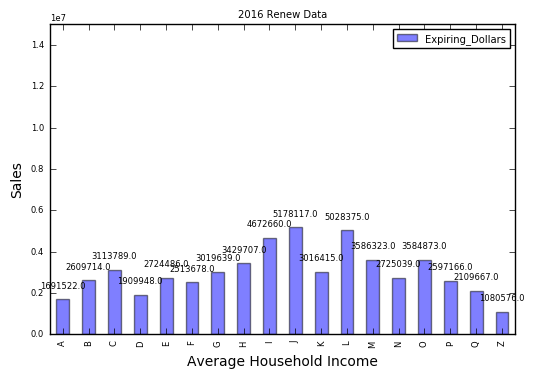

In [42]:
 ax = sub_16_demo_ren.groupby(['Avg_Household_Income'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 Renew Data", alpha=0.5 , ylim=(0,15000000))
plt.xlabel('Average Household Income', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

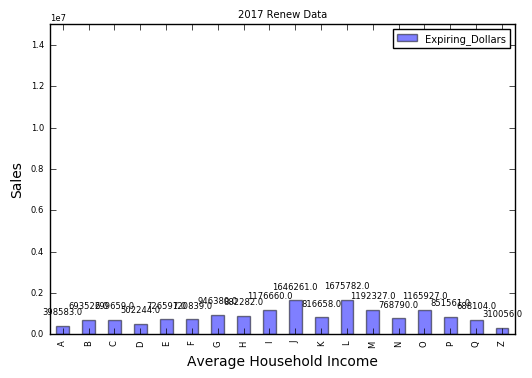

In [43]:
 ax = sub_17_demo_ren.groupby(['Avg_Household_Income'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,15000000))
plt.xlabel('Average Household Income', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

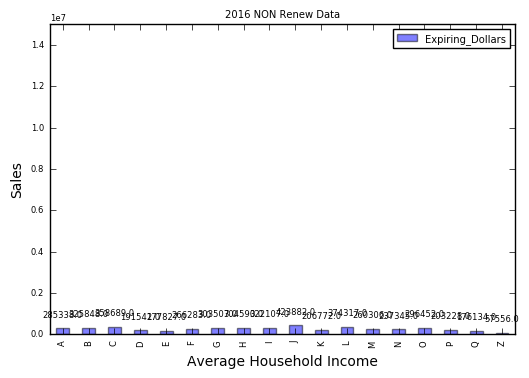

In [44]:
 ax = sub_16_demo_nonren.groupby(['Avg_Household_Income'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 NON Renew Data", alpha=0.5 , ylim=(0,15000000))
plt.xlabel('Average Household Income', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

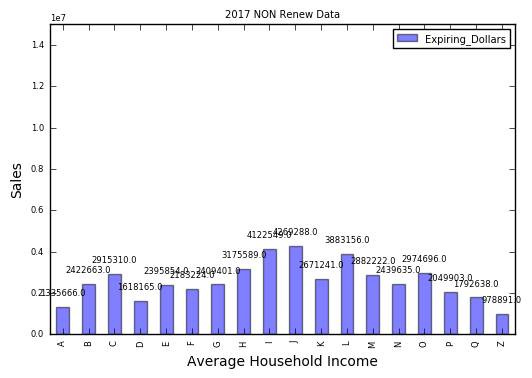

In [45]:
 ax = sub_17_demo_nonren.groupby(['Avg_Household_Income'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 NON Renew Data", alpha=0.5 , ylim=(0,15000000))
plt.xlabel('Average Household Income', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

##### Title_1_Code A $ .00 - $149.99  B $150.00 - $299.99  C $300.00 - $499.99  D $500.00 Plus  Space Unclassified 


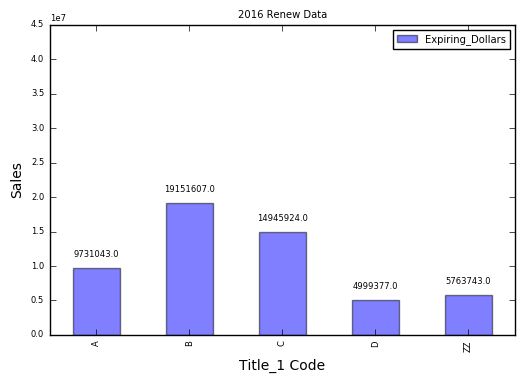

In [46]:
 ax = sub_16_demo_ren.groupby(['Title_1_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Title_1 Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

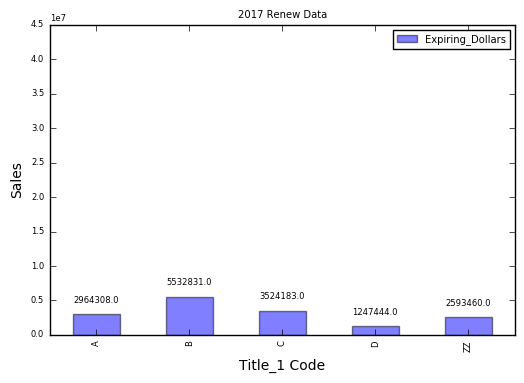

In [47]:
 ax = sub_17_demo_ren.groupby(['Title_1_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Title_1 Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

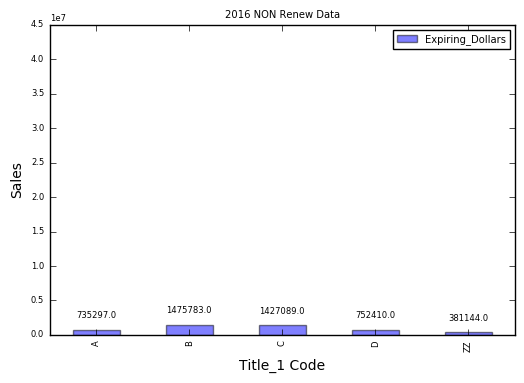

In [48]:
 ax = sub_16_demo_nonren.groupby(['Title_1_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 NON Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Title_1 Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

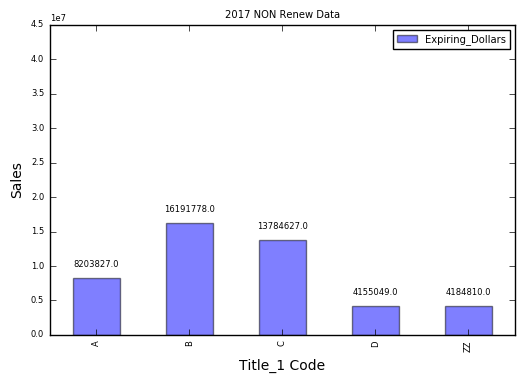

In [49]:
 ax = sub_17_demo_nonren.groupby(['Title_1_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 NON Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Title_1 Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Training_Budget_Per_head "A $1 - $4  B $5 - $6  C $7 - $8  D $9 - $10 E $11 - $13  F $14 - $16 G $17 - $24 H $25 + Z Unclassified

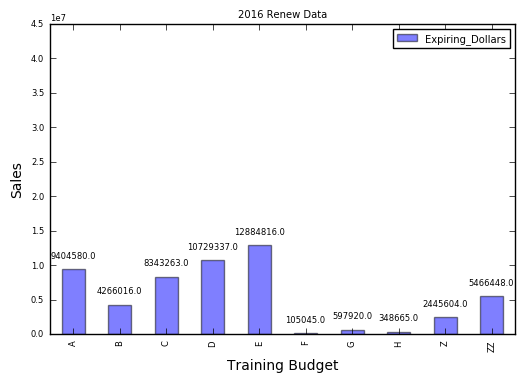

In [50]:
 ax = sub_16_demo_ren.groupby(['Training_Budget_Per_head'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Training Budget', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

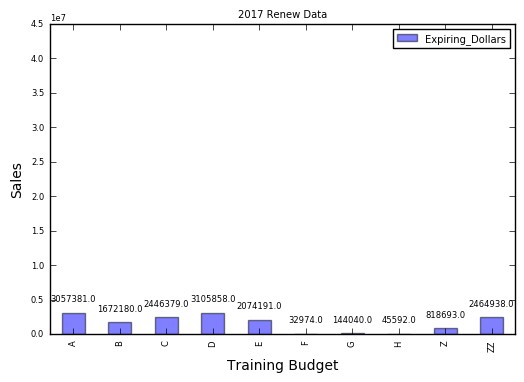

In [51]:
 ax = sub_17_demo_ren.groupby(['Training_Budget_Per_head'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Training Budget', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

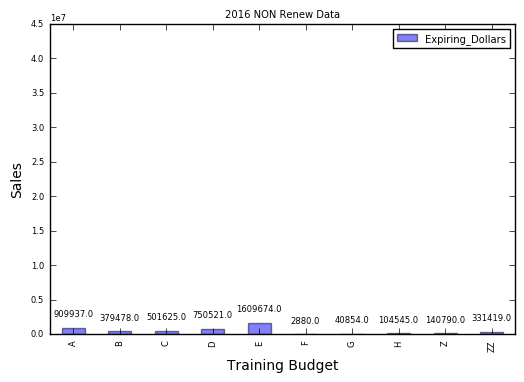

In [52]:
 ax = sub_16_demo_nonren.groupby(['Training_Budget_Per_head'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 NON Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Training Budget', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

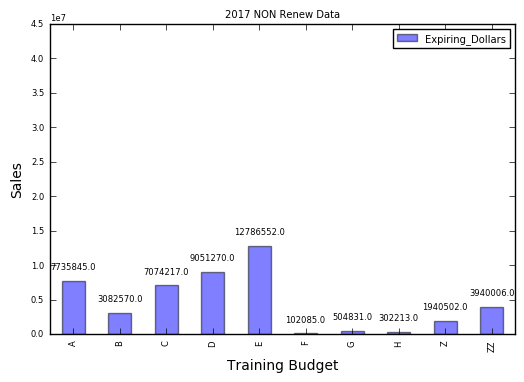

In [53]:
 ax = sub_17_demo_nonren.groupby(['Training_Budget_Per_head'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 NON Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Training Budget', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Lunch_Program_Eligible_Students 

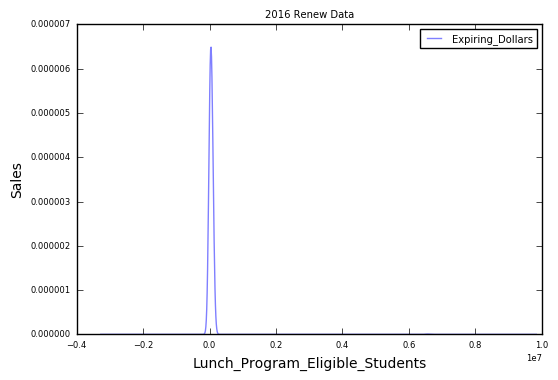

In [54]:
 ax = sub_16_demo_ren.groupby(['Lunch_Program_Eligible_Students'])['Expiring_Dollars'].sum().plot(kind="density" , title= "2016 Renew Data", alpha=0.5 )
plt.xlabel('Lunch_Program_Eligible_Students', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

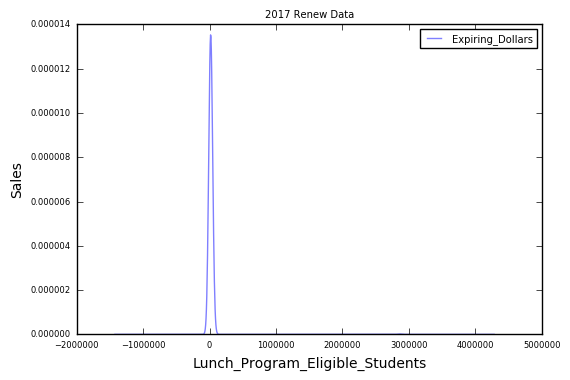

In [55]:
 ax = sub_17_demo_ren.groupby(['Lunch_Program_Eligible_Students'])['Expiring_Dollars'].sum().plot(kind="density" , title= "2017 Renew Data", alpha=0.5 )
plt.xlabel('Lunch_Program_Eligible_Students', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

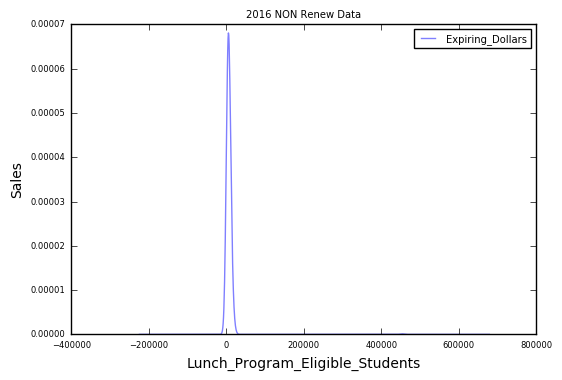

In [56]:
 ax = sub_16_demo_nonren.groupby(['Lunch_Program_Eligible_Students'])['Expiring_Dollars'].sum().plot(kind="density" , title= "2016 NON Renew Data", alpha=0.5 )
plt.xlabel('Lunch_Program_Eligible_Students', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

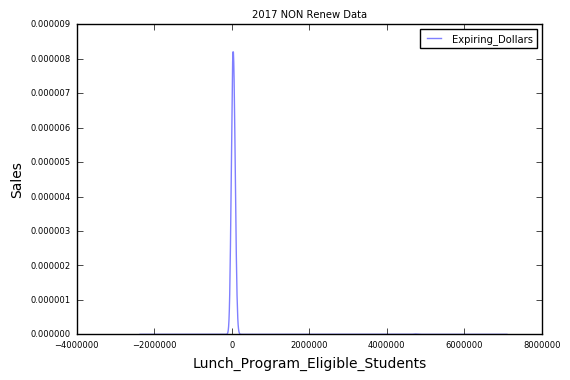

In [57]:
 ax = sub_17_demo_nonren.groupby(['Lunch_Program_Eligible_Students'])['Expiring_Dollars'].sum().plot(kind="density" , title= "2017 NON Renew Data", alpha=0.5 )
plt.xlabel('Lunch_Program_Eligible_Students', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Affluence_Indicator 1 Low 2 Below Average  3 Average  4 Above Average  5 High  Space Unknown    

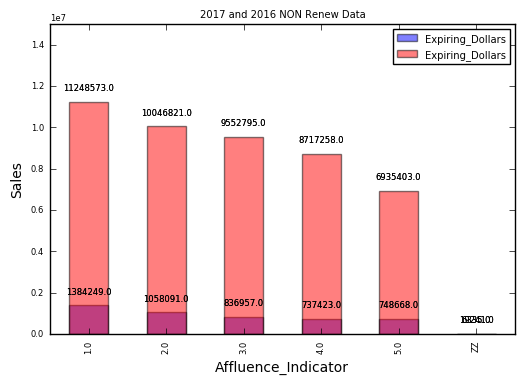

In [58]:
ax1 = sub_16_demo_nonren.groupby(['Affluence_Indicator'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 and 2016 NON Renew Data", alpha=0.5,color="Blue" ,ylim=(0,15000000))
ax = sub_17_demo_nonren.groupby(['Affluence_Indicator'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 and 2016 NON Renew Data", alpha=0.5,color="Red" ,ylim=(0,15000000))
plt.xlabel('Affluence_Indicator', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax1.patches:
    ax1.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

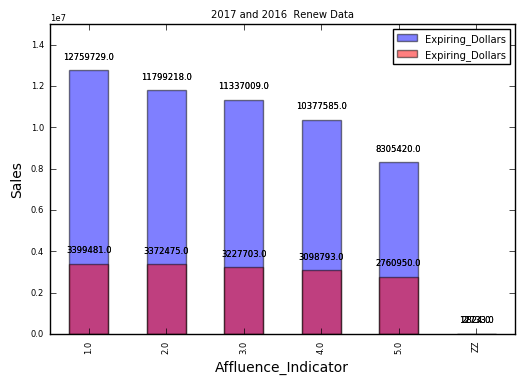

In [59]:
ax1 = sub_16_demo_ren.groupby(['Affluence_Indicator'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 and 2016  Renew Data", alpha=0.5,color="Blue" ,ylim=(0,15000000))
ax = sub_17_demo_ren.groupby(['Affluence_Indicator'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 and 2016  Renew Data", alpha=0.5,color="Red" ,ylim=(0,15000000))
plt.xlabel('Affluence_Indicator', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax1.patches:
    ax1.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Average Selling Price = Sales / Number of Students 

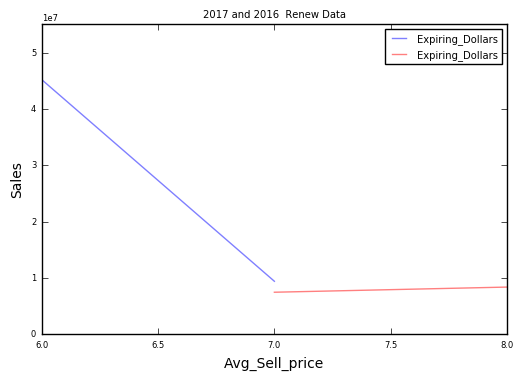

In [60]:
ax1 = sub_16_demo_ren.groupby(['Avg_Sell_price'])['Expiring_Dollars'].sum().plot(kind="line" , title= "2017 and 2016  Renew Data", alpha=0.5,color="Blue" ,ylim=(0,55000000))
ax = sub_17_demo_ren.groupby(['Avg_Sell_price'])['Expiring_Dollars'].sum().plot(kind="line" , title= "2017 and 2016  Renew Data", alpha=0.5,color="Red" ,ylim=(0,55000000))
plt.xlabel('Avg_Sell_price', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax1.patches:
    ax1.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

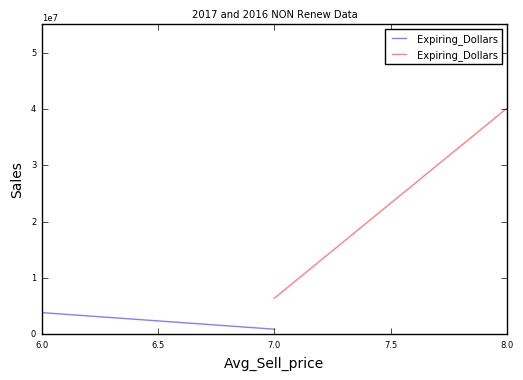

In [61]:
ax1 = sub_16_demo_nonren.groupby(['Avg_Sell_price'])['Expiring_Dollars'].sum().plot(kind="line" , title= "2017 and 2016 NON  Renew Data", alpha=0.5,color="Blue" ,ylim=(0,55000000))
ax = sub_17_demo_nonren.groupby(['Avg_Sell_price'])['Expiring_Dollars'].sum().plot(kind="line" , title= "2017 and 2016 NON Renew Data", alpha=0.5,color="Red" ,ylim=(0,55000000))
plt.xlabel('Avg_Sell_price', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax1.patches:
    ax1.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

## Data Modelling 

###### Label Encoding on Data For Modelling 

In [62]:
# Creating the Training Data 
frames = [sub_16_demo_ren, sub_16_demo_nonren, sub_17_demo_ren]
Final_train = pd.concat(frames)

In [63]:
# Manupulating the Data , For Missing Data iMputing Random value 
# IN Subscription End Date and Renewal Date 

Final_train.loc[(Final_train.Subscription_End_Date== 'ZZ') ,'Subscription_End_Date' ] = 0
Final_train.loc[(Final_train.Renewal_Date== 'ZZ') ,'Renewal_Date' ] = 0
                
test = pd.DataFrame(sub_17_demo_nonren)
test['Subscription_End_Date'] = test['Subscription_End_Date'].apply(pd.to_datetime)

Final_train['Subscription_End_Date'] = Final_train['Subscription_End_Date'].apply(pd.to_datetime)
Final_train['Renewal_Date'] = Final_train['Renewal_Date'].apply(pd.to_datetime)

Final_train.loc[(Final_train.Renew_delay== 'ZZ') ,'Renew_delay' ] = 999
test.loc[(test.Renew_delay== 'ZZ') ,'Renew_delay' ] = 999

In [64]:
# Saving the Files  Training and Test        
         
Final_train.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\Train.csv", index=True , header=True)     
test.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\test.csv", index=True , header=True) 

In [65]:
# Manually Labelling the Subscription_Status for further analysis 
y = pd.DataFrame(Final_train['Subscription_Status'])
Final_train = Final_train.drop('Subscription_Status', 1)
test = test.drop('Subscription_Status', 1)

y.loc[(y.Subscription_Status== 'Renewed') ,'Subscription_Status' ] = 0
y.loc[(y.Subscription_Status== 'Not Renewed') ,'Subscription_Status' ] = 1

Y_train = list(y.Subscription_Status.values)

In [66]:
# Encoding the variable
Final_train_Data = Final_train.apply(lambda x: d[x.name].fit_transform(x))
test_Data = test.apply(lambda x: d1[x.name].fit_transform(x))


In [67]:
# Checking the Corrrelation Matrix 
Corr_Analysis_Train = Final_train_Data.corr()
Corr_Analysis_Train.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\Corr_Analysis_Train.csv", index=True , header=True)
Corr_Analysis_Train

,ID,State,Subscription_End_Date,Expiring_Dollars,Expiring_Students,Renewal_Date,Metro_Code,Apple_Mac_Code,PC_Code,Poverty_Level_Code,Avg_Household_Income,Title_1_Code,Software_budget_per_head,Training_Budget_Per_head,Lunch_Program_Eligible_Students,Affluence_Indicator,Avg_Sell_price,Renew_delay,Days_group
ID,1.000000,-0.095962,-0.011059,0.018423,0.018499,0.009274,0.009948,0.039980,-0.130746,-0.040224,0.124866,-0.065124,-0.188744,-0.103766,0.005604,0.161202,-0.004899,-0.033298,-0.044256
State,-0.095962,1.000000,-0.021967,-0.128804,-0.125126,-0.026287,-0.055793,-0.057519,-0.045344,-0.025007,-0.037231,-0.031800,0.097045,0.061361,-0.126394,0.026276,-0.024648,0.017015,0.008720
Subscription_End_Date,-0.011059,-0.021967,1.000000,0.146446,-0.038972,0.790792,-0.027661,-0.001414,-0.006042,0.007688,0.018711,0.000902,0.012356,0.005958,-0.045527,0.001067,0.916995,-0.210561,-0.175087
Expiring_Dollars,0.018423,-0.128804,0.146446,1.000000,0.974231,0.128901,0.152090,-0.109922,0.012586,-0.147413,0.021397,-0.196848,-0.189206,-0.223423,0.570142,0.016300,0.164691,-0.017566,0.010216
Expiring_Students,0.018499,-0.125126,-0.038972,0.974231,1.000000,-0.014144,0.159568,-0.109917,0.014965,-0.149925,0.017358,-0.198779,-0.192335,-0.225749,0.590749,0.017682,-0.039002,0.032147,0.049172
Renewal_Date,0.009274,-0.026287,0.790792,0.128901,-0.014144,1.000000,-0.035764,-0.011264,-0.020004,0.014925,0.026624,-0.000022,0.029794,0.029475,-0.065167,0.015018,0.714769,-0.134941,-0.533838
Metro_Code,0.009948,-0.055793,-0.027661,0.152090,0.159568,-0.035764,1.000000,0.203701,0.331575,0.219712,-0.105220,0.198117,0.096803,0.097116,0.187099,-0.030609,-0.032476,0.048508,0.055507
Apple_Mac_Code,0.039980,-0.057519,-0.001414,-0.109922,-0.109917,-0.011264,0.203701,1.000000,0.550571,0.495471,0.050218,0.505427,0.403266,0.476649,-0.212020,0.025204,-0.002857,0.005236,-0.027367
PC_Code,-0.130746,-0.045344,-0.006042,0.012586,0.014965,-0.020004,0.331575,0.550571,1.000000,0.619059,-0.007720,0.606740,0.553712,0.582489,-0.102818,-0.026385,-0.011498,0.040364,0.021492
Poverty_Level_Code,-0.040224,-0.025007,0.007688,-0.147413,-0.149925,0.014925,0.219712,0.495471,0.619059,1.000000,-0.307062,0.883271,0.548445,0.616956,-0.103302,-0.089415,-0.000756,0.018108,-0.045176


In [68]:
# Predicting the Renewed and Non Renewed Data for 2017 Defining X and Y 
X = Final_train_Data

In [69]:
log_reg = LogisticRegression(solver='liblinear', C=100, tol=0.08)
log_reg.fit(X,Y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.08,
          verbose=0, warm_start=False)

In [70]:
print(log_reg.score(X, Y_train))

0.999965150723


In [71]:
y_test = log_reg.predict(test_Data)

In [72]:
# Inverse the encoded
test = test_Data.apply(lambda x: d1[x.name].inverse_transform(x))
test['Subscription_Status'] = y_test

In [73]:
# Manually Un-Labelling the Subscription_Status 
test.loc[(test.Subscription_Status== 0) ,'Subscription_Status' ] = 'Renewed'
test.loc[(test.Subscription_Status== 1) ,'Subscription_Status' ] = 'Not Renewed'

In [74]:
test.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\Final_Results.csv", index=True , header=True)  

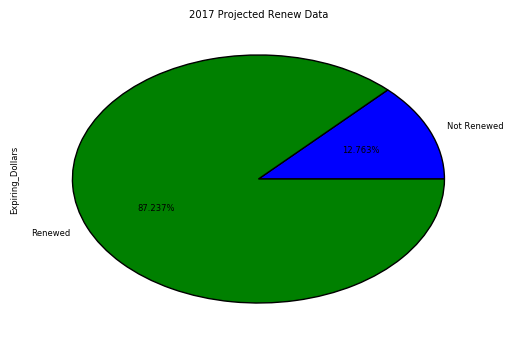

In [75]:
test_results = test 
# CHecking and Analysing the Results
test_results.groupby(['Subscription_Status'])['Expiring_Dollars'].count().plot(kind="pie" , autopct='%3.3f%%',title= "2017 Projected Renew Data")
plt.show()

###### Months in which Chances of Getting Renewed 

In [76]:
frames = [sub_16_demo_ren, sub_16_demo_nonren]
Data_2016 = pd.concat(frames)
Data_final_2016 = Data_2016.drop(Data_2016[Data_2016['Subscription_Status'] == "Not Renewed"].index)


frames1 = [sub_17_demo_ren, test_results]
Data_2017 = pd.concat(frames1)
Data_final_2017 = Data_2017.drop(Data_2017[Data_2017['Subscription_Status'] == "Not Renewed"].index)


Data_final_2016['Subscription_End_Date'] = Data_final_2016['Subscription_End_Date'].apply(pd.to_datetime)
Data_final_2017['Subscription_End_Date'] = Data_final_2017['Subscription_End_Date'].apply(pd.to_datetime)

Data_final_2016['month'] = pd.DatetimeIndex(Data_final_2016['Subscription_End_Date']).month
Data_final_2017['month'] = pd.DatetimeIndex(Data_final_2017['Subscription_End_Date']).month

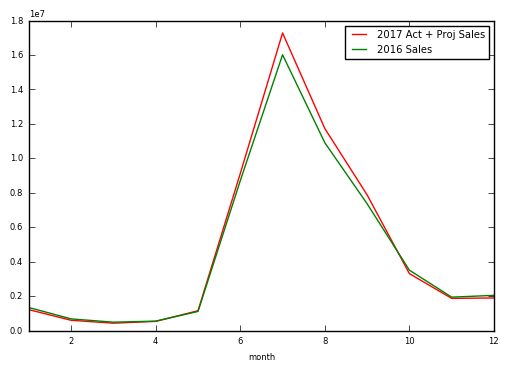

In [77]:
Data_final_2017.groupby(['month'])['Expiring_Dollars'].sum().plot(kind="line", color="Red" , label="2017 Act + Proj Sales")
Data_final_2016.groupby(['month'])['Expiring_Dollars'].sum().plot(kind="line", color="Green" , label="2016 Sales")
plt.legend()
plt.show()

###### Getting Non Subscribed School are in which Cities more 

In [78]:
non_subs_school= pd.DataFrame(test_results[test_results['Subscription_Status']=="Not Renewed"])

In [79]:
non_subs_school.columns

Index([u'ID', u'State', u'Subscription_End_Date', u'Expiring_Dollars',
       u'Expiring_Students', u'Renewal_Date', u'Metro_Code', u'Apple_Mac_Code',
       u'PC_Code', u'Poverty_Level_Code', u'Avg_Household_Income',
       u'Title_1_Code', u'Software_budget_per_head',
       u'Training_Budget_Per_head', u'Lunch_Program_Eligible_Students',
       u'Affluence_Indicator', u'Avg_Sell_price', u'Renew_delay',
       u'Days_group', u'Subscription_Status'],
      dtype='object')

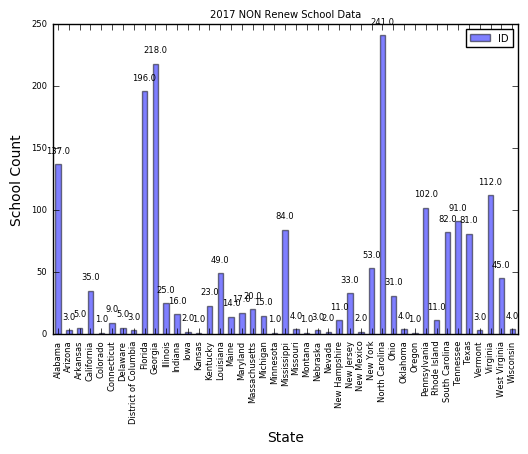

In [80]:
 ax = non_subs_school.groupby(['State'])['ID'].count().plot(kind="Bar" , title= "2017 NON Renew School Data", alpha=0.5 )
plt.xlabel('State', fontsize=10)
plt.ylabel('School Count', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()